# Ensemble Techniques

These are the mostly used Ensembles in Machine Learning

 * Voting Ensembles
 * Stacking
 * Bagging (Bootstrap Aggregation) - Random Forest
 * Cascading
 * Boosting - AdaBoost, GBDT and XGBoost

## Import Required Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("data/credit_card_defaulter.csv")

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [12]:
df['defaulted'].value_counts()

defaulted
0    23364
1     6636
Name: count, dtype: int64

In [14]:
df['defaulted'].value_counts(normalize= True)

defaulted
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [17]:
# Identifying the target variable
X = df.drop(columns = 'defaulted', axis = 1)
y = df['defaulted']

# Importing train_test_split
from sklearn.model_selection import train_test_split

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

### Building the Model - `Stacking`

In [90]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators = [("lr", LogisticRegression()),
             ('knn', KNeighborsClassifier(n_neighbors= 10)),
             ('dt', DecisionTreeClassifier(random_state= 42))]

stack_clfr = StackingClassifier(estimators= estimators,
                               final_estimator= DecisionTreeClassifier())

stack_clfr.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=DecisionTreeClassifier())

In [91]:
predictions = stack_clfr.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.6784

********** Conf Matrix **********
[[4614 1259]
 [1153  474]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5873
           1       0.27      0.29      0.28      1627

    accuracy                           0.68      7500
   macro avg       0.54      0.54      0.54      7500
weighted avg       0.69      0.68      0.68      7500




### Building the Model - `RandomForest`


* Random **Bootstrap** Sampling with Replacement
  * Column Sampling with Replacement
  * Row Sampling with Replacement
* **Base Learners** with `High Variance and Low Bias` i.e. Overfitted Models - **Fully Grown Decision Trees** 
* Aggregation
  * Majority Voting (Classification Task)
  * Mean or Median (Regression Task)

In [130]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf_clfr = RandomForestClassifier()

# Fit the Random Forest model
rf_clfr.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
predictions = rf_clfr.predict(X_test)

In [134]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8136

********** Conf Matrix **********
[[5529  344]
 [1054  573]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.62      0.35      0.45      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500




### Tuning Hyperparameter - `max_depth`

In [168]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{'max_depth' : list(range(2, 20, 5))}]

rf_clfr = GridSearchCV(estimator = RandomForestClassifier(),
                      param_grid= tuned_params,
                      cv = 5,
                      scoring= 'accuracy',
                      return_train_score= True,
                      verbose= 1)
                         
rf_clfr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 7, 12, 17]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [169]:
print("Best parameters set found on train set")
print(rf_clfr.best_params_)
print(rf_clfr.best_estimator_)
print()

print('Score on Test Data: ', rf_clfr.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 12}
RandomForestClassifier(max_depth=12)

Score on Test Data:  0.8209333333333333


In [170]:
cv_results = pd.DataFrame(rf_clfr.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.958112,0.046184,0.025056,0.008014,2,{'max_depth': 2},0.803333,0.800444,0.804889,0.805778,...,0.802578,0.002749,4,0.802667,0.799278,0.804333,0.806833,0.803722,0.803367,0.002461
1,2.593899,0.107257,0.034737,0.001642,7,{'max_depth': 7},0.822000,0.825111,0.820444,0.814889,...,0.819333,0.004186,2,0.835833,0.835389,0.834111,0.836778,0.837333,0.835889,0.001122
2,4.050553,0.124792,0.071768,0.009542,12,{'max_depth': 12},0.822667,0.825778,0.819556,0.816889,...,0.819689,0.004276,1,0.882389,0.884556,0.884556,0.887778,0.887222,0.885300,0.001971
3,5.198395,0.033591,0.087378,0.020126,17,{'max_depth': 17},0.820667,0.821111,0.816889,0.814444,...,0.816756,0.003917,3,0.928278,0.924778,0.925944,0.928778,0.929278,0.927411,0.001743


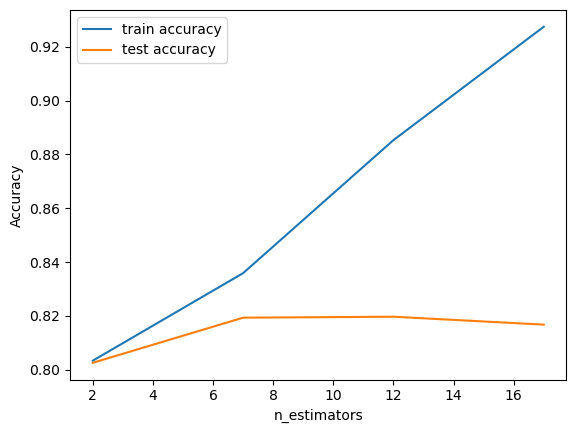

In [174]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy') 
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

### Tuning Hyperparameter - `n_estimators`

In [176]:
tuned_params = [{'n_estimators' : list(range(20, 500, 100))}]

rf_clfr = GridSearchCV(estimator = RandomForestClassifier(),
                      param_grid= tuned_params,
                      cv = 5,
                      scoring= 'accuracy',
                      return_train_score= True,
                      verbose= 1)

rf_clfr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [20, 120, 220, 320, 420]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [177]:
print("Best parameters set found on train set")
print(rf_clfr.best_params_)
print(rf_clfr.best_estimator_)
print()

print('Score on Test Data: ', rf_clfr.score(X_test, y_test))

Best parameters set found on train set
{'n_estimators': 220}
RandomForestClassifier(n_estimators=220)

Score on Test Data:  0.8170666666666667


In [178]:
cv_results = pd.DataFrame(rf_clfr.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.285814,0.020614,0.027756,0.009527,20,{'n_estimators': 20},0.811333,0.814222,0.815556,0.810889,...,0.811644,0.003225,5,0.993556,0.994278,0.992944,0.993278,0.993722,0.993556,0.000447
1,7.288485,0.206703,0.122454,0.007851,120,{'n_estimators': 120},0.819556,0.822667,0.820000,0.814889,...,0.817778,0.003908,2,1.000000,0.999944,1.000000,1.000000,1.000000,0.999989,0.000022
2,13.602508,0.371994,0.229068,0.019407,220,{'n_estimators': 220},0.820000,0.821556,0.821556,0.814000,...,0.817956,0.003840,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,19.918091,0.847963,0.358182,0.048414,320,{'n_estimators': 320},0.818222,0.821556,0.821111,0.815556,...,0.817733,0.003504,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,25.598353,1.197558,0.448584,0.047168,420,{'n_estimators': 420},0.819333,0.824444,0.819111,0.815778,...,0.817511,0.005124,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


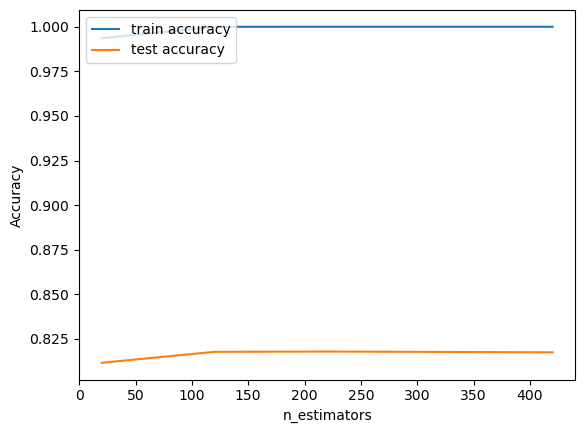

In [179]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

### Fitting the final model with tunned hyperparameter

In [189]:
rf = RandomForestClassifier(max_depth = 12,
                           n_estimators = 220)

# Measure the time taken to fit the model
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

# Calculate and print the duration
duration = end_time - start_time
print(f"Time taken to fit RandomForestClassifier: {duration:.2f} seconds")

Time taken to fit RandomForestClassifier: 11.30 seconds


In [193]:
# Measure the time taken to make predictions
start_time = time.time()
predictions = rf.predict(X_test)
end_time = time.time()

# Calculate and print the duration
duration = end_time - start_time
print(f"Time taken to make predictions: {duration:.4f} seconds")

Time taken to make predictions: 0.2213 seconds


In [195]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.82

********** Conf Matrix **********
[[5577  296]
 [1054  573]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500




### Feature Importance with RandomForest

In [197]:
rf.feature_importances_

array([0.0426297 , 0.04131187, 0.00568466, 0.01150782, 0.00767209,
       0.03501119, 0.18838326, 0.09420227, 0.05454064, 0.03667234,
       0.03673575, 0.02906699, 0.04102733, 0.03671257, 0.03492629,
       0.03434304, 0.03378423, 0.03454307, 0.04074758, 0.03589588,
       0.03425527, 0.03133052, 0.02867911, 0.03033653])

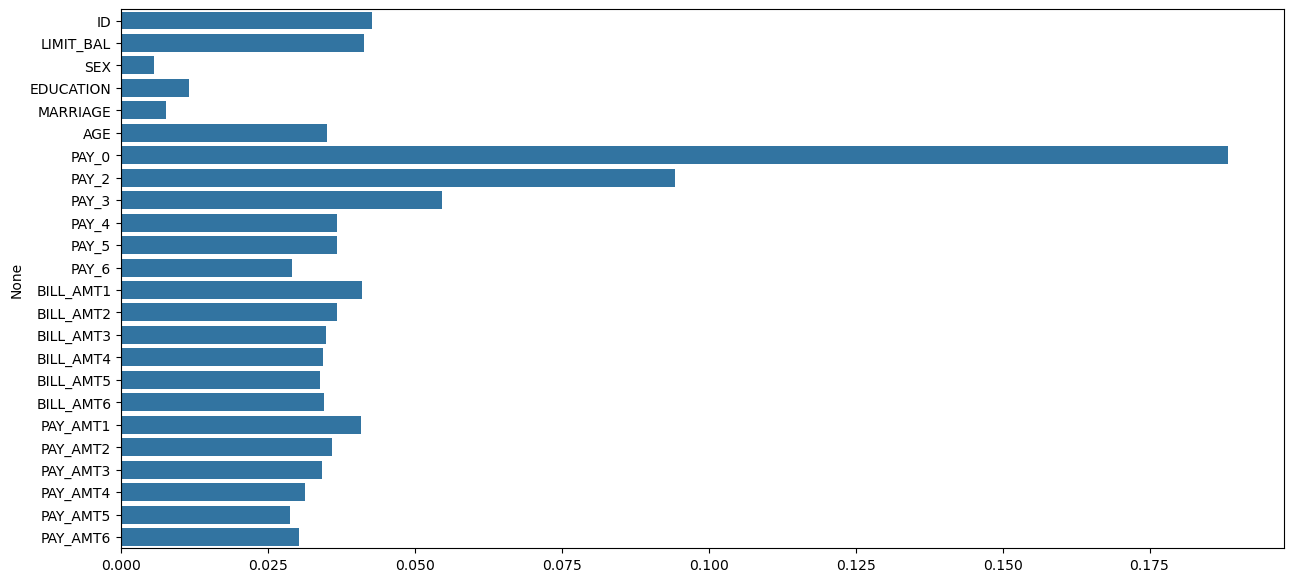

In [201]:
plt.figure(figsize=(15,7))
sns.barplot(x = rf.feature_importances_, y = X_train.columns)
plt.show()

### Building the model - AdaBoost

In [206]:
from sklearn.ensemble import AdaBoostClassifier

shallow_tree = DecisionTreeClassifier(max_depth= 2, random_state= 42)

ada_cflr = AdaBoostClassifier(estimator= shallow_tree)
ada_cflr.fit(X_train, y_train)

predictions = ada_cflr.predict(X_test)

In [208]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8170666666666667

********** Conf Matrix **********
[[5523  350]
 [1022  605]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.63      0.37      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.74      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500




### Hyperparameter Tuning for AdaBoost
`learning_rate`,` base_estimator`,`max_depth` and`n_estimators`  in AdaBoost Algorithm

In [236]:
tuned_params = [{'learning_rate': list(range(1, 5, 1)),
                'n_estimators': list(range(1, 100, 10))}]

shallow_tree = DecisionTreeClassifier(max_depth= 2, random_state= 42)

ada_cflr = GridSearchCV(estimator= AdaBoostClassifier(estimator= shallow_tree, random_state= 42),
                       param_grid= tuned_params,
                       cv = 5,
                       scoring= 'accuracy',
                       return_train_score= True,
                       verbose= 1,
                       n_jobs= -1)

ada_cflr.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': [1, 2, 3, 4],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [244]:
print('Best parameters found on train set')
print(ada_cflr.best_params_)
print(ada_cflr.best_estimator_)
print()

print('Score on Test Data :', ada_cflr.score(X_test, y_test))

Best parameters found on train set
{'learning_rate': 1, 'n_estimators': 1}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=1, n_estimators=1, random_state=42)

Score on Test Data : 0.8197333333333333


### Fitting the final model with tunned hyperparameter

In [252]:
from sklearn.ensemble import AdaBoostClassifier

shallow_tree = DecisionTreeClassifier(max_depth= 2, random_state= 42)

ada_cflr = AdaBoostClassifier(estimator= shallow_tree,
                             learning_rate= 1, 
                             n_estimators= 1, 
                             random_state = 42)

ada_cflr.fit(X_train, y_train)

predictions = ada_cflr.predict(X_test)

In [254]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8197333333333333

********** Conf Matrix **********
[[5656  217]
 [1135  492]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5873
           1       0.69      0.30      0.42      1627

    accuracy                           0.82      7500
   macro avg       0.76      0.63      0.66      7500
weighted avg       0.80      0.82      0.79      7500




### Building the Model - `GBDT`

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clfr = GradientBoostingClassifier()

gbdt_clfr.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
predictions = gbdt_clfr.predict(X_test)

In [82]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8216

********** Conf Matrix **********
[[5576  297]
 [1041  586]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.36      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500




### Hyperparameter Tuning for GBDT
`learning_rate`  and`sub_sample`  in GBDT)

In [19]:
tuned_params = [{'learning_rate' : list(np.arange(0.1, 1.1, 0.3)), 
                'subsample' : list(np.arange(0.1, 1.1, 0.3))}]

gbdt_clfr = GridSearchCV(estimator= GradientBoostingClassifier(), 
                        param_grid= tuned_params, 
                        cv = 5, 
                        scoring= 'accuracy',
                        return_train_score= True,
                        verbose= 1,
                        n_jobs=-1)

gbdt_clfr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.4, 0.7000000000000001,
                                            1.0000000000000002],
                          'subsample': [0.1, 0.4, 0.7000000000000001,
                                        1.0000000000000002]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
print('Best parameters found on train set')
print(gbdt_clfr.best_params_)
print(gbdt_clfr.best_estimator_)
print()

print('Score on Test Data :', gbdt_clfr.score(X_test, y_test))

Best parameters found on train set
{'learning_rate': 0.1, 'subsample': 0.7000000000000001}
GradientBoostingClassifier(subsample=0.7000000000000001)

Score on Test Data : 0.8208


**Note** : The **GBDT** Model with `default` parameters performed well compare to the GBDT Hypertuned parameters.

### Feature Importance with GBDT

In [50]:
gbdt_clfr.feature_importances_

array([0.01593863, 0.02865338, 0.00214649, 0.00928978, 0.00450399,
       0.00841161, 0.62068214, 0.07249597, 0.04604814, 0.02143231,
       0.01325401, 0.02081338, 0.02355374, 0.00615106, 0.00817678,
       0.00253397, 0.0022654 , 0.00399009, 0.023038  , 0.01648712,
       0.02066318, 0.01495615, 0.00497591, 0.00953878])

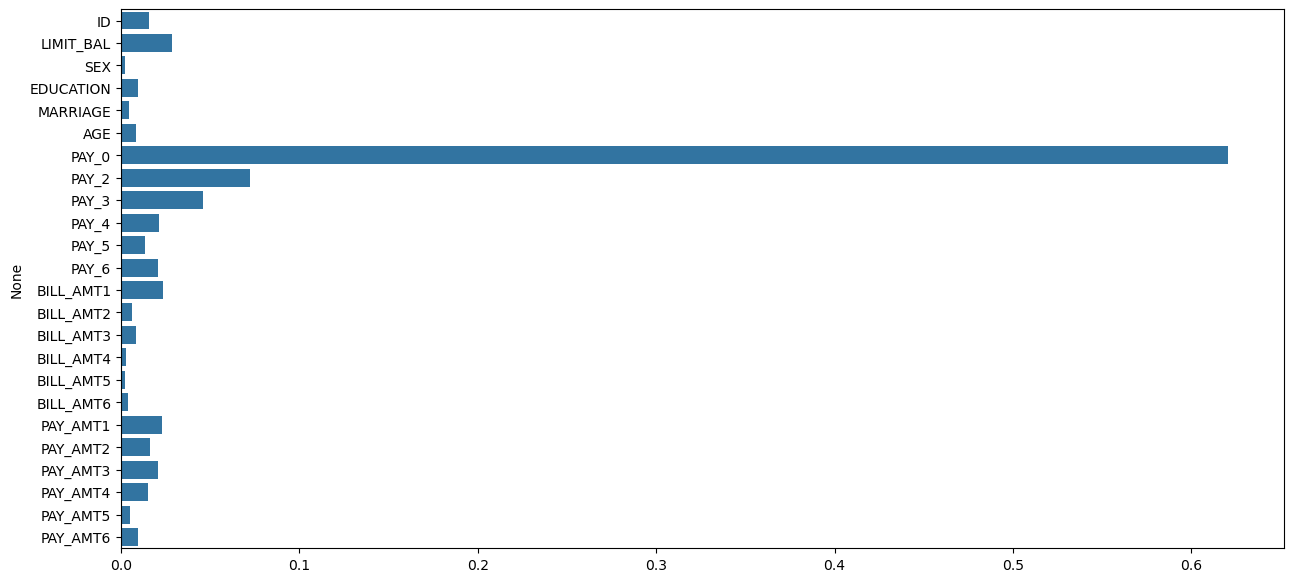

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x = gbdt_clfr.feature_importances_, y = X_train.columns)
plt.show()

### Building the model - `XGBoost`

In [78]:
! pip install XGBoost

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [62]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
predictions = model_xgb.predict(X_test)

In [76]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8114666666666667

********** Conf Matrix **********
[[5499  374]
 [1040  587]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.61      0.36      0.45      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500




### Feature importance with XGBoost

In [89]:
model_xgb.feature_importances_

array([0.01922951, 0.02567489, 0.01897284, 0.02271471, 0.01991108,
       0.01892707, 0.35969454, 0.10970644, 0.04421573, 0.04254664,
       0.02321393, 0.03719753, 0.02499369, 0.02228067, 0.02018741,
       0.01946164, 0.02009409, 0.01865443, 0.0209871 , 0.02418614,
       0.02487346, 0.02262357, 0.0191909 , 0.02046209], dtype=float32)

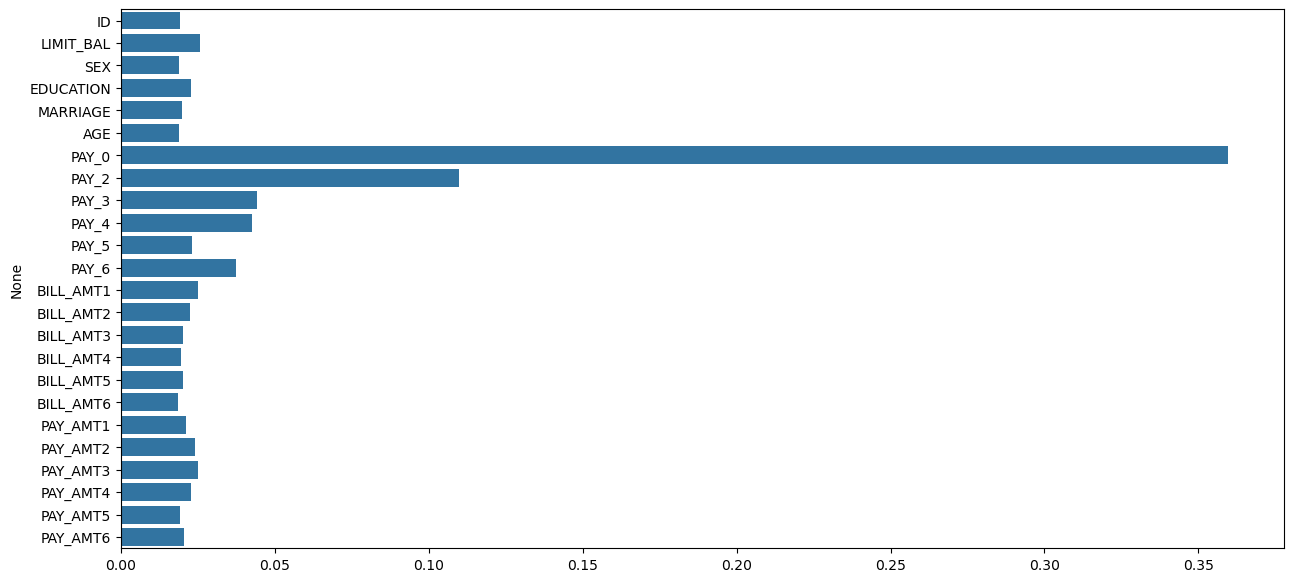

In [91]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_xgb.feature_importances_, y = X_train.columns, )
plt.show() 

**Conclusion** : Apart from `Stacking` remaining ensembles like`RandomForest, XGBoost, GBDT, AdaBoost` given better performance 